In [18]:
import pandas as pd

data = pd.read_csv('../../data/processed/import_declarations_intermax_daily.csv')

data['Date'] = pd.to_datetime(data['Date'])
data
data['Abgabe_rolling'] = data['Abgabe'].rolling(window=30).mean()

data.Abgabe_rolling.dropna()
X = data
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))


Observations: 1045
Training Observations: 689
Testing Observations: 356


In [19]:
train = train.dropna(subset=['Abgabe_rolling'])

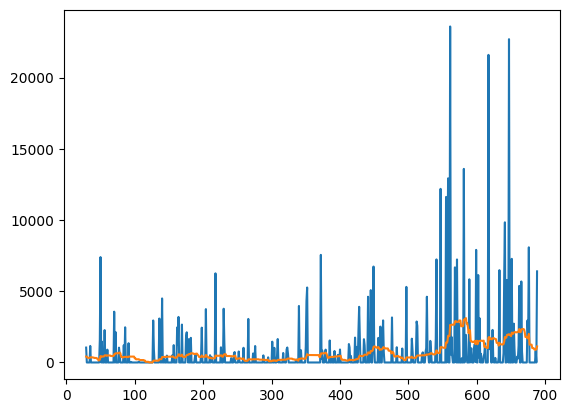

In [20]:
import matplotlib.pyplot as plt

plt.plot(train.Abgabe)
plt.plot(train.Abgabe_rolling)

In [21]:
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day

test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day
features = train.drop(columns=['Abgabe_rolling', 'Date', 'Abgabe'])
features_test = test.drop(columns=['Abgabe_rolling', 'Date', 'Abgabe'])

/tmp/ipykernel_283520/1280367779.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Year'] = test['Date'].dt.year
/tmp/ipykernel_283520/1280367779.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Month'] = test['Date'].dt.month
/tmp/ipykernel_283520/1280367779.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Wie installiert man das?

In [22]:
import numpy as np
import tensorflow as tf

lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units=1)
])

lstm_model.compile(optimizer='adam', loss='mse')
features_train_reshaped = np.reshape(features, (features.shape[0], features.shape[1], 1))

lstm_model.fit(features_train_reshaped, train.Abgabe_rolling, epochs=10)

Epoch 1/10


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 920225.7500
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 914826.8750
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 896825.8125
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 843074.2500
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 954037.8125
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 947646.0625
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 869679.8125
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 933610.6875
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 936270.1250
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 949888.7500


In [23]:
features_test_reshaped = np.reshape(features_test, (features_test.shape[0], features_test.shape[1], 1))
predicted_values = lstm_model.predict(features_test_reshaped)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [30]:
predicted_values

array([[[ 7.478903 ],
        [12.203625 ],
        [13.333776 ]],

       [[ 7.478903 ],
        [12.203625 ],
        [13.332208 ]],

       [[ 7.478903 ],
        [12.203625 ],
        [13.330373 ]],

       ...,

       [[ 7.4789186],
        [12.20363  ],
        [13.327639 ]],

       [[ 7.4789186],
        [12.20363  ],
        [13.330552 ]],

       [[ 7.4789186],
        [12.20363  ],
        [13.332857 ]]], dtype=float32)

In [29]:
from data_preperation import get_validation_matrix

print(get_validation_matrix(predicted_values, test['Abgabe_rolling']))

ValueError: Found array with dim 3. None expected <= 2.

ValueError: x and y can be no greater than 2D, but have shapes (356,) and (356, 3, 1)

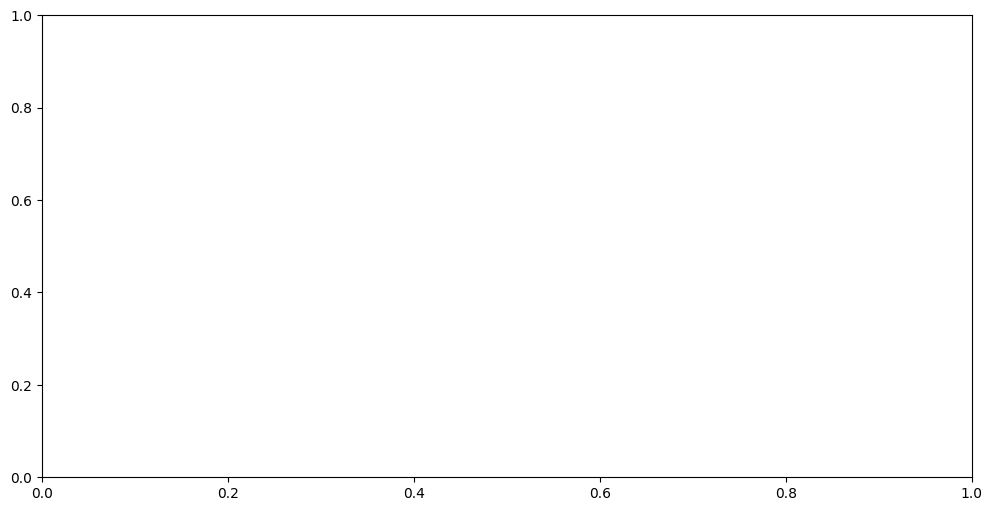

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, predicted_values)
plt.plot(test.index, test['Abgabe_rolling'], label='Actual', color='red')
plt.figure(figsize=(8, 6))
plt.scatter(test['Abgabe_rolling'], predicted_values, color='blue', label='Predictions')
plt.plot(test['Abgabe_rolling'], test['Abgabe_rolling'], color='red', label='Actual')  # Plotting the identity line
plt.title('Actual vs Predicted Abgabe_rolling')
plt.xlabel('Actual Abgabe_rolling')
plt.ylabel('Predicted Abgabe_rolling')
plt.legend()
plt.grid(True)
plt.show()